In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 10

In [2]:
filepath = "E:/download/heart.csv"
heart_df = pd.read_csv(filepath)
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_counts = heart_df['target'].value_counts()

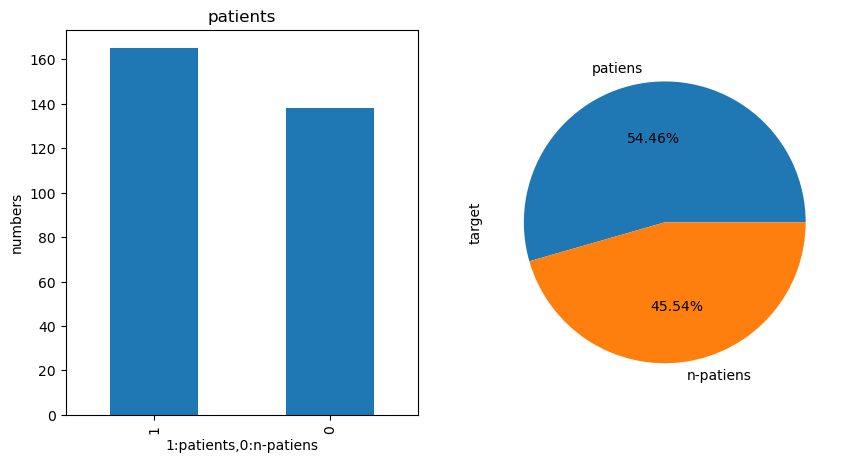

In [6]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
ax = heart_counts.plot(kind='bar',ax = axes[0])
ax.set_title('patients')
ax.set_xlabel('1:patients,0:n-patiens')
ax.set_ylabel('numbers')
heart_counts.plot(kind='pie',autopct='%.2f%%',labels=['patiens','n-patiens'])

Text(0.5, 1.0, 'patiens%')

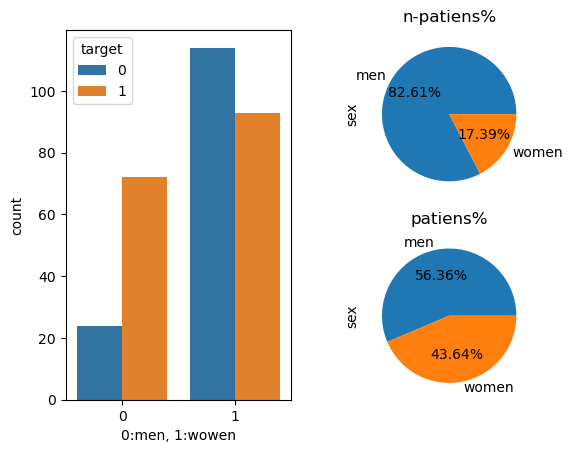

In [7]:
plt.figure()
ax1 = plt.subplot(121)
ax = sns.countplot(x='sex',hue='target',data=heart_df,ax=ax1)
ax.set_xlabel('0:men, 1:wowen')

ax2 = plt.subplot(222)
heart_no_counts =  heart_df[heart_df['target']==0].sex.value_counts()

heart_no_counts.plot(kind='pie',autopct='%.2f%%',labels=['men','women'],ax=ax2)
ax2.set_title('n-patiens%')

ax3 = plt.subplot(224)
heart_yes_counts = heart_df[heart_df['target']==1].sex.value_counts()
heart_yes_counts.plot(kind='pie',autopct='%.2f%%',labels=['men','women'],ax=ax3)
ax3.set_title('patiens%')

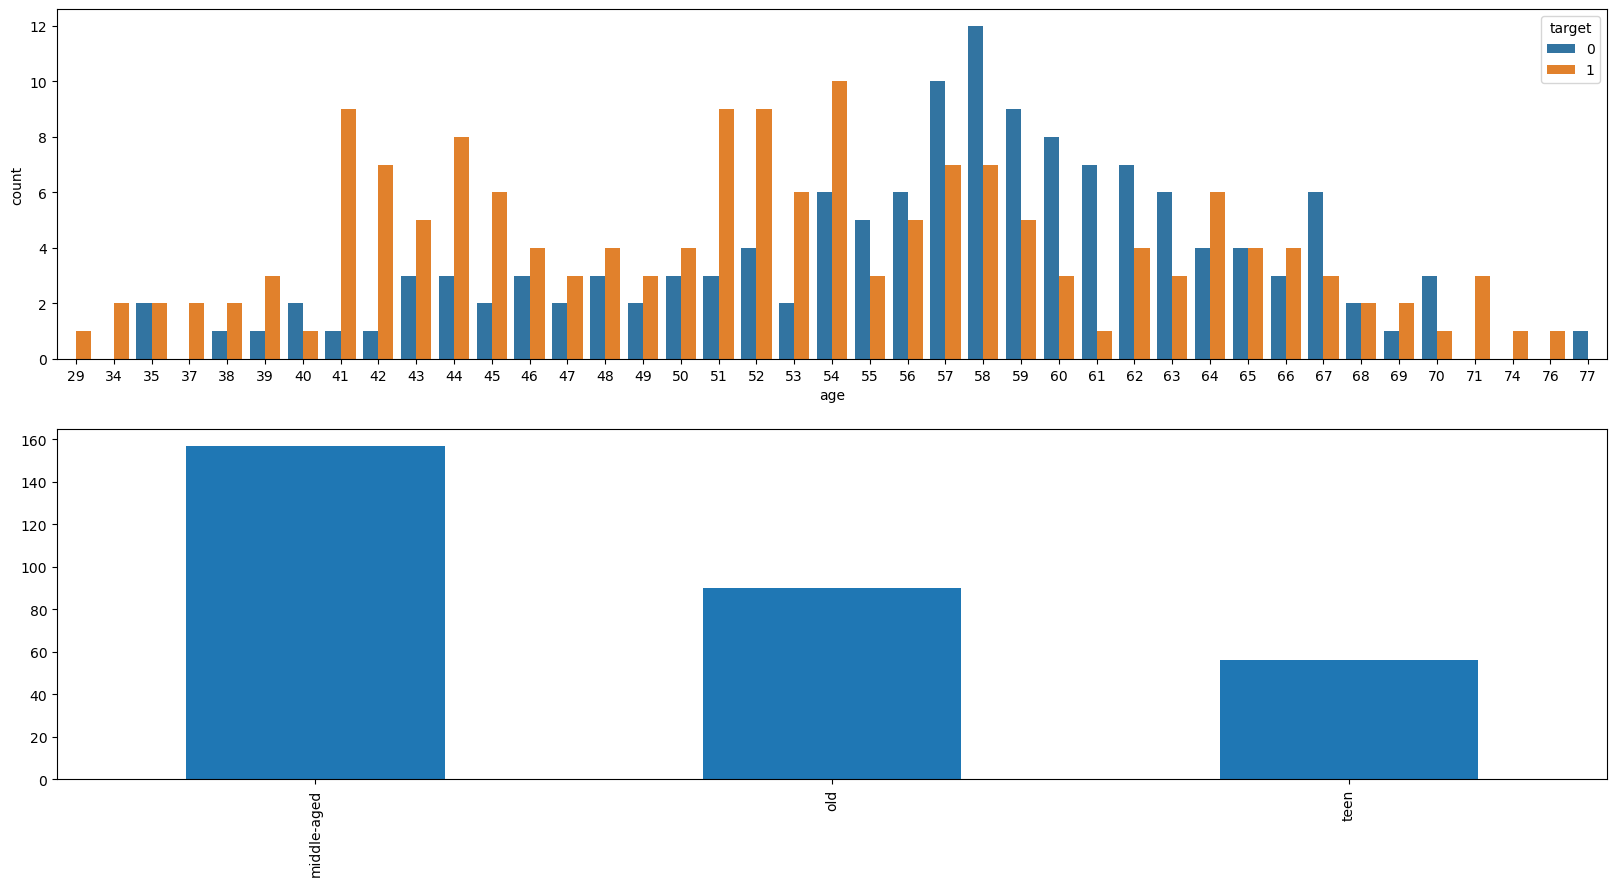

In [9]:
fig,axes = plt.subplots(2,1,figsize=(20,10))
sns.countplot(x='age',hue='target',data=heart_df,ax=axes[0])

age_cut = pd.cut(heart_df.age,bins=[0,45,60,100],include_lowest=True,right=False,labels=['teen','middle-aged','old'])
age_cut.value_counts().plot(kind='bar')

Text(0.5, 1.0, 'n-patiens-age')

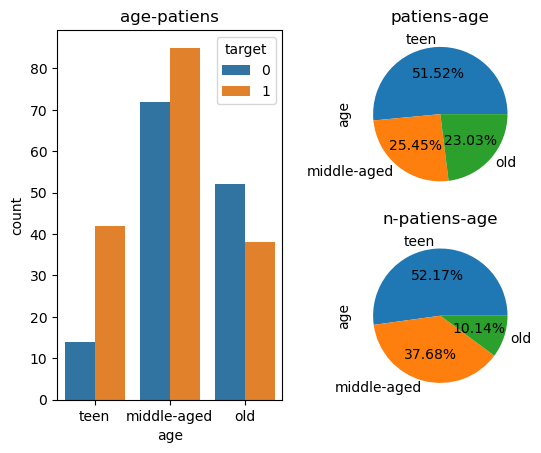

In [10]:
# 指定水平方向拼接，指定轴axis=1
age_target_df = pd.concat([age_cut,heart_df['target']],axis=1)
 
# 绘制条形图，每个年龄段有多少人得病，有多少人没得病
plt.figure()
ax4 = plt.subplot(121)
sns.countplot(x='age',hue='target',data=age_target_df,ax=ax4)
ax4.set_title('age-patiens')
 
# 饼图，绘制患病的人中，每个年龄段所占比例
ax5 = plt.subplot(222)
# 所有患病的人中，对年龄特征计数
age_target_df[age_target_df.target==1].age.value_counts().plot(kind='pie',autopct='%.2f%%',labels=['teen','middle-aged','old'],ax=ax5)
ax5.set_title('patiens-age')
 
# 饼图，绘制没有患病的人中，每个年龄段的比例
ax6 = plt.subplot(224)
age_target_df[age_target_df.target==0].age.value_counts().plot(kind='pie',autopct='%.2f%%',labels=['teen','middle-aged','old'],ax=ax6)
ax6.set_title('n-patiens-age')

C:\Users\WenBi\AppData\Local\Temp\ipykernel_11968\1011243106.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_df.iloc[:,i],kde=True)
C:\Users\WenBi\AppData\Local\Temp\ipykernel_11968\1011243106.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_df.iloc[:,i],kde=True)
C:\Users\Wen

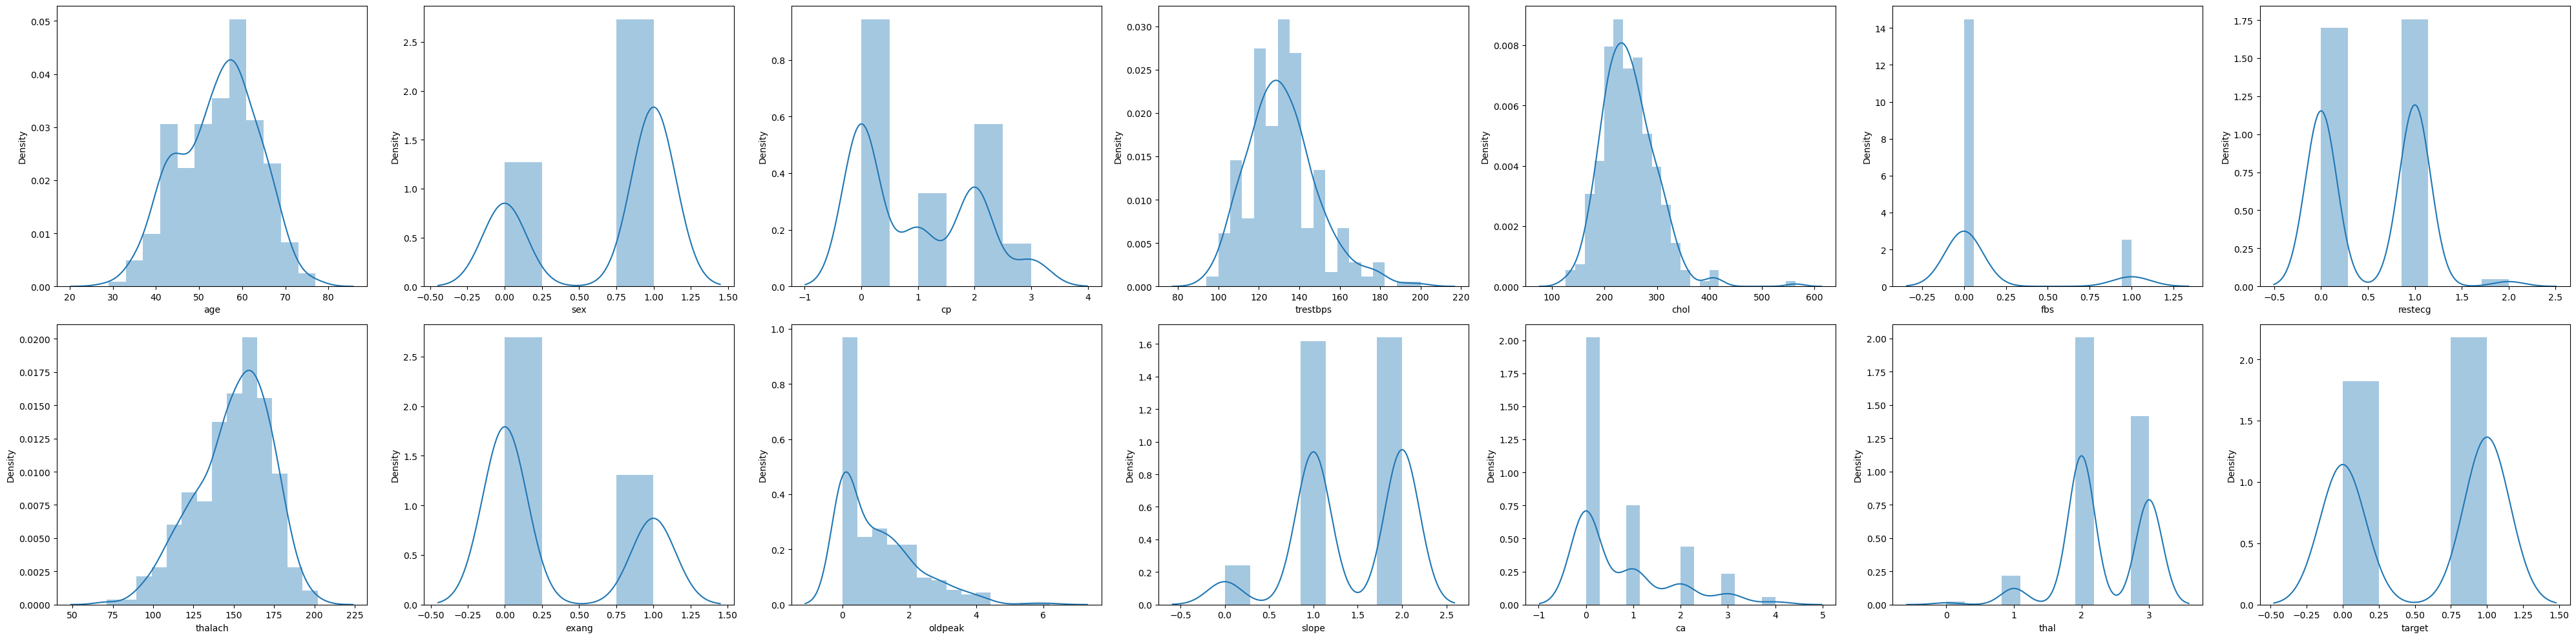

In [11]:
fig,axes = plt.subplots(2,7,figsize=(40,10))
for i in range(14):
    plt.subplot(2,7,i+1)
    sns.distplot(heart_df.iloc[:,i],kde=True)
plt.tight_layout()

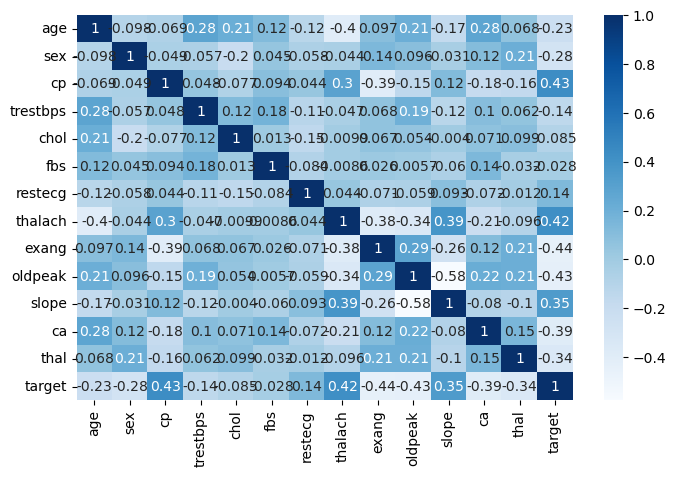

In [12]:
heart_corr = heart_df.corr()
plt.figure(figsize=(8,5))

sns.heatmap(heart_df.corr(),cmap='Blues',annot=True)

In [13]:
features = heart_df.drop(columns=['target'])  # 删除target这一列，剩下的就是特征值
targets = heart_df['target']

In [14]:
features[['sex','cp','fbs','exang','slope','thal','restecg','ca']] = features[['sex','cp','fbs','exang','slope','thal','restecg','ca']].astype('object')

features_dis = features[['sex','cp','fbs','restecg','exang','slope','ca','thal']]
features_con = features.drop(columns=features_dis.columns)

features_dis = pd.get_dummies(features_dis)

C:\Users\WenBi\AppData\Local\Temp\ipykernel_11968\1784280455.py:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  features_dis = pd.get_dummies(features_dis)


In [15]:
from sklearn.preprocessing import StandardScaler
features_con = pd.DataFrame(StandardScaler().fit_transform(features_con))


features_temp = features_con.join(features_dis)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features_temp,targets,test_size=0.25)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)

C:\Users\WenBi\anaconda3\envs\24723_Pytorch\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KNeighborsClassifier()

In [18]:
y_predict = knn.predict(x_test)
y_predict

C:\Users\WenBi\anaconda3\envs\24723_Pytorch\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [19]:
from sklearn.model_selection import cross_val_score


cross = cross_val_score(knn,features_temp,targets)  #x_train和x_test已经被分割过了；这里会自动分割
result_cross = cross.mean()
result_cross

C:\Users\WenBi\anaconda3\envs\24723_Pytorch\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\WenBi\anaconda3\envs\24723_Pytorch\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\WenBi\anaconda3\envs\24723_Pytorch\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\WenBi\anaconda3\envs\24723_Pytorch\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. A

0.831584699453552

In [20]:
from sklearn.metrics import precision_score
result_precision = precision_score(y_test,y_predict)
result_precision

0.8723404255319149

In [21]:
from sklearn.metrics import recall_score
result_recall = recall_score(y_test,y_predict)
result_recall

0.82

In [22]:
from sklearn.metrics import f1_score
result_f1 = f1_score(y_test,y_predict)
result_f1

0.8453608247422681

In [23]:
from sklearn.metrics import precision_recall_curve

y_predict_proba = knn.predict_proba(x_test)
precisions,recalls,thretholds = precision_recall_curve(y_test,y_predict_proba[:,1])

C:\Users\WenBi\anaconda3\envs\24723_Pytorch\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Text(0, 0.5, 'TPR')

C:\Users\WenBi\anaconda3\envs\24723_Pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WenBi\anaconda3\envs\24723_Pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WenBi\anaconda3\envs\24723_Pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 31934 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WenBi\anaconda3\envs\24723_Pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20934 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WenBi\anaconda3\envs\24723_Pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\WenBi\anaconda3\envs\

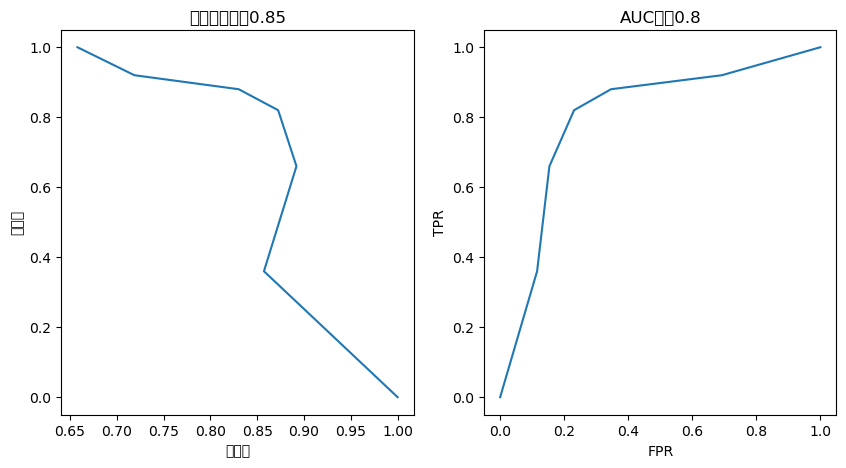

In [26]:
from sklearn.metrics import average_precision_score
precisions_average = average_precision_score(y_test,y_predict_proba[:,1])

fig,axes = plt.subplots(1,2,figsize=(10,5)) #设置画布，1行2列
# 在第一张画布上绘图
axes[0].plot(precisions,recalls)
axes[0].set_title(f'mean_acc：{round(precisions_average,2)}')
axes[0].set_xlabel('recall')
axes[0].set_ylabel('acc')


# ROC曲线绘制
from sklearn.metrics import roc_curve
# 传入参数：y_true真实值，y_predict_proba预测到的概率
# 产生返回值，FP、TP、阈值
fpr,tpr,thretholds = roc_curve(y_test,y_predict_proba[:,1])
# 计算AUC得分
from sklearn.metrics import auc
# 传入参数：fpr、tpr
AUC = auc(fpr,tpr) 
 
# 绘图
axes[1].plot(fpr,tpr) #传入FP和TP的值
axes[1].set_title(f'AUC:{round(AUC,2)}')
axes[1].set_xlabel('FPR')
axes[1].set_ylabel('TPR')
